In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Run preprocessing file
%run '../preprocessing/cleaning.ipynb'
data.head()

/var/folders/zs/m6739hc50mq3f4g25bdk88m80000gn/T/ipykernel_10886/4202787016.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Family_size'][i] = 1 + data['Kids'][i]
/var/folders/zs/m6739hc50mq3f4g25bdk88m80000gn/T/ipykernel_10886/4202787016.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Family_size'][i] = 2 + data['Kids'][i]


,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Kids,Family_size,Age,Days_is_client,ActiveDays,MntTotal,NumAllPurchases,AverageCheck,ShareDealsPurchases,TotalAcceptedCmp
0,Graduation,Not in relationship,58138.0,58,635,88,546,172,88,88,...,0,1,57,972,914,1617,22,73.5,13.6,1
1,Graduation,Not in relationship,46344.0,38,11,1,6,2,1,6,...,2,3,60,126,88,27,4,6.8,50.0,0
2,Graduation,In relationship,71613.0,26,426,49,127,111,21,42,...,0,2,49,473,447,776,20,38.8,5.0,0
3,Graduation,In relationship,26646.0,26,11,4,20,10,3,5,...,1,3,30,66,40,53,6,8.8,33.3,0
4,PhD,In relationship,58293.0,94,173,43,118,46,27,15,...,1,3,33,322,228,422,14,30.1,35.7,0


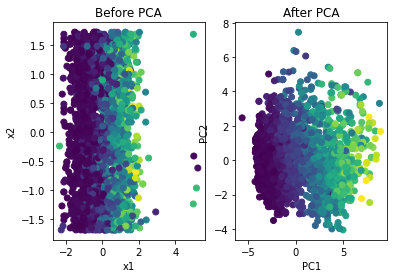

[0.31647344 0.09452552]


In [101]:
# Drop categorical data
data = data.drop(['Education','Marital_Status'], axis=1)

Y = data['Days_is_client'].copy()
X = data.drop(['Days_is_client'], axis=1)
columns = X.columns
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=Y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=Y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

print(pca.explained_variance_ratio_)


In [102]:
def biplot(score, coeff , y):
    '''
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

['Income' 'Recency' 'MntWines' 'MntFruits' 'MntMeatProducts'
 'MntFishProducts' 'MntSweetProducts' 'MntGoldProds' 'NumDealsPurchases'
 'NumWebPurchases' 'NumCatalogPurchases' 'NumStorePurchases'
 'NumWebVisitsMonth' 'AcceptedCmp3' 'AcceptedCmp4' 'AcceptedCmp5'
 'AcceptedCmp1' 'AcceptedCmp2' 'Complain' 'Response' 'Kids' 'Family_size'
 'Age' 'Days_is_client' 'ActiveDays' 'NumAllPurchases' 'AverageCheck'
 'ShareDealsPurchases' 'TotalAcceptedCmp']
[[ 0.27761902 -0.00122153  0.26391788  0.21767554  0.26601079  0.2262518
   0.21883111  0.1811984  -0.0591186   0.17573916  0.26572891  0.23380028
  -0.20161082  0.02452806  0.08893743  0.16823367  0.1476871   0.05566653
  -0.01197851  0.10436336 -0.20764685 -0.18307292  0.03749152  0.03159127
   0.03161591  0.28156695  0.28380175 -0.24642794  0.17196817]
 [-0.03657953 -0.05911656  0.1573485  -0.09486033 -0.05437247 -0.09590689
  -0.07380171  0.07197662  0.3557965   0.20091548  0.01176692  0.02603711
   0.30553131  0.12865774  0.19379016  0.08810

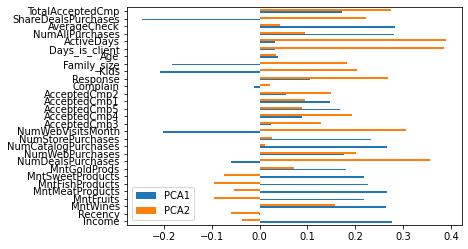

In [110]:
print(columns.values)
print(pca.components_)
col_pca = np.vstack((columns.values, pca.components_))

df = pd.DataFrame({'PCA1': pca.components_[0], 'PCA2': pca.components_[1]}, index=columns.values)
ax = df.plot.barh()
